In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt

In [9]:
def SSE(a,b):
    '''
    Computes the sum of squared errors given to arrays.
    '''
    return np.sum((a-b)**2)

In [10]:
# Load data
u_train = np.load('u_train.npy')
print(u_train.shape, u_train)
output_train = np.load('output_train.npy')
print(output_train.shape, output_train)
u_test = np.load('u_test.npy')
print(u_test.shape, u_test)

(2040,) [5. 5. 5. ... 5. 5. 5.]
(2040,) [-0.02047077  0.04789433 -0.05194387 ...  6.25651479  6.01250205
  5.30327333]
(510,) [-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.  5.  5.  5.  5.  5.  5

In [11]:
### INVESTIGATE DIFFERENT MODEL TYPES ###

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def yo():

    # Define variables for comparison
    import time


    best_SSE = np.Inf
    best_params = (0,0,0,0)

    # print([i for i in range(1, 10)], [i for i in range(9, 0, -1)])
    # print([i for i in range(10)], [i for i in range(9, -1, -1)])

    # Loop over model order parameters n, m and d (integers in range [0,9])
    try:
        for n in range(1,10):
            for m in range(10):
                for d in range(10):

                    # Take care of special case: 
                    # If n=1 no y-vaules will be used, and if m=0 no u-values will be used. Hence, no data will be used.
                    if n == 1 and m == 0:
                        continue
                        

                    # Construct regressor matrix
                    p = max(n,d+m)
                    N = len(output_train)
                    phi = []
                    for k in range(p,N):
                        # Append previous output values (y) and input values (u)
                        temp_array = np.hstack((output_train[k-n:k][::-1], u_train[k-d-m:k-d+1][::-1]))
                        phi.append(temp_array)
                    X = np.array(phi)

                    # Adjust output vector
                    Y = output_train[p:N]

                    # Split data into training and validation set
                    thres = int(0.75*len(Y))
                    X_train = X[0:thres,:]
                    Y_train = Y[0:thres]
                    X_validation = X[thres:,:]
                    Y_validation = Y[thres:]

                    # Obtain model and prediction using ordinary least squares linear regression 
                    model_LS = LinearRegression(fit_intercept=False)
                    model_LS.fit(X_train, Y_train)
                    prediction_LS = model_LS.predict(X_validation)
                    SSE_LS = SSE(prediction_LS,Y_validation)

                    if SSE_LS < best_SSE:
                        best_SSE = SSE_LS
                        best_params = (n,m,d,'LS')
                        print(best_params, best_SSE)

                    # Obtain model and prediction using Ridge regression with cross validation
                    model_Ridge = Ridge(fit_intercept=False)
                    model_Ridge.fit(X_train, Y_train)
                    prediction_Ridge = model_Ridge.predict(X_validation)
                    SSE_Ridge = SSE(prediction_Ridge,Y_validation)

                    if SSE_Ridge < best_SSE:
                        best_SSE = SSE_Ridge
                        best_params = (n,m,d,'Ridge')
                        print(best_params, best_SSE)

                    #  Obtain model and prediction using Lasso regression with cross validation
                    model_Lasso = Lasso(fit_intercept=False)
                    model_Lasso.fit(X_train, Y_train)
                    prediction_Lasso = model_Lasso.predict(X_validation)
                    SSE_Lasso = SSE(prediction_Lasso,Y_validation)

                    if SSE_Lasso < best_SSE:
                        best_SSE = SSE_Lasso
                        best_params = (n,m,d,'Lasso')
                        print(best_params, best_SSE)
                    
                    if best_SSE == SSE_LS or best_SSE == SSE_Ridge or best_SSE == SSE_Lasso:
                        with open("XY.txt", "w") as f:
                            # print(len(X_validation), len(Y_validation), len(prediction_LS), len(prediction_Ridge), len(prediction_Lasso))
                            for i in range(len(X_validation)):
                                yo = [str(X_validation[i]).replace('\n',"       "), str(round(Y_validation[i],8)).replace('\n', "       "), str(round(prediction_LS[i],8)).replace('\n', "       "), str(round(prediction_Ridge[i],8)).replace('\n', "       "), str(round(prediction_Lasso[i],8)).replace('\n', "       ")]
                                f.write(f"{yo}\n")
    except KeyboardInterrupt:
        pass
    return best_params, best_SSE
best_params, best_SSE = yo()

(1, 1, 0, 'LS') 626.7143694599247
(1, 1, 0, 'Ridge') 626.713974425867
(1, 1, 1, 'LS') 621.0451453822034
(1, 1, 1, 'Ridge') 621.0446527543859
(1, 1, 2, 'LS') 618.7106259432401
(1, 1, 2, 'Ridge') 618.7098525123436
(1, 1, 3, 'LS') 596.1000271753242
(1, 1, 3, 'Ridge') 596.0998473886007
(1, 1, 4, 'LS') 520.5175156659807
(1, 1, 5, 'LS') 377.9885761469196
(1, 1, 6, 'LS') 376.5522082186536
(1, 2, 5, 'LS') 369.11645457461486
(1, 2, 6, 'LS') 362.1407679897257
(1, 2, 7, 'LS') 356.5805515493638
(1, 3, 5, 'LS') 354.1865050932987
(1, 3, 6, 'LS') 303.3628065840421
(1, 4, 5, 'LS') 293.5332616837404
(1, 4, 6, 'LS') 266.86545348775024
(1, 4, 6, 'Ridge') 266.8649765660829
(1, 5, 5, 'LS') 255.00417999195173
(1, 5, 5, 'Ridge') 255.0028250879928
(1, 6, 4, 'LS') 250.45370209598246
(1, 6, 4, 'Ridge') 250.45172327437456
(1, 6, 6, 'LS') 239.11720668941177
(1, 6, 6, 'Ridge') 239.1170036750064
(1, 7, 5, 'LS') 229.4842483039751
(1, 7, 5, 'Ridge') 229.483004633512
(1, 7, 6, 'LS') 181.22123971834617
(1, 7, 6, 'Ridge

In [12]:
best_params, best_SSE = best_params, best_SSE
print(f"The best parameters are (n,m,d,model): {best_params}")
print(f"The lowest sum of squared errors is: {best_SSE}")

The best parameters are (n,m,d,model): (9, 9, 6, 'LS')
The lowest sum of squared errors is: 8.001697846677217


In [13]:
### SET UP OPTIMAL MODEL ###

# Define model order parameters
n, m, d = best_params[0:3]

# Construct regressor matrix
p = max(n,d+m)
N = len(output_train)
phi = []
for k in range(p,N):
    # Append previous output values (y) and input values (u)
    temp_array = np.hstack((output_train[k-n:k][::-1], u_train[k-d-m:k-d+1][::-1]))
    phi.append(temp_array)
X = np.array(phi)

# Adjust output vector
Y = output_train[p:N]

# Train model
model_final = LinearRegression(fit_intercept=False)
model_final.fit(X, Y)

LinearRegression(fit_intercept=False)

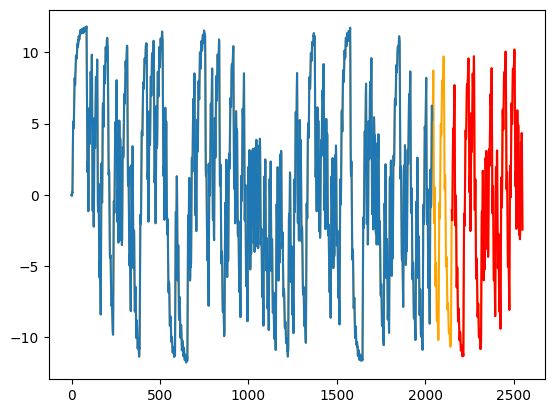

In [38]:
### MAKE PREDICTIONS ###

u_complete = np.hstack((u_train, u_test))
y_complete = output_train

for k in range(2040,len(u_complete)):
    inpt = np.hstack((y_complete[k-n:k][::-1], u_complete[k-d-m:k-d+1][::-1]))
    output_k = model_final.predict(inpt.reshape(-1, 1).T)
    y_complete = np.hstack((y_complete, output_k))


predictions = y_complete[-400:]

plt.plot(y_complete, color='orange')
plt.plot(output_train)
# set color to red on last 400 values
plt.plot(range(len(y_complete)-400,len(y_complete)), predictions, color='red')

plt.show()

In [136]:
# Save predictions for submission
np.save('predictions',predictions)